# Transverse Ising Model
+ date: 2017-03-25

In [1]:
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
from functools import reduce

In [2]:
s0=array([[1,0], [0,1]], dtype=int8)
sx=array([[0,1], [1,0]], dtype=int8)
sy=array([[0, -1j],[1j, 0]], dtype=complex)
sy1=array([[0, 0],[0, 0]], dtype=int8)#ersatz
sz=array([[1,0], [0,-1]], dtype=int8)
zz=kron(sz, sz)
sigma=[s0,sx,sy1,sz]

In [3]:
def sparsity(A):
    B=A.todense()
    return sum(B!=0)/B.size
def Hamilton_trans(n, g=0, J=1):
    assert(n>2)
    A=(-J)*sum(
        reduce(sp.kron, 
               (sigma[3*(k==i or (k+1)%n==i)]
                for i in range(n)))
        for k in range(n)
    ).astype(float64)
    A-=g*sum(
        reduce(sp.kron, 
               (sigma[k==i]
                for i in range(n)))
        for k in range(n)
    )
    return A

## Sparsity of Hamiltonian

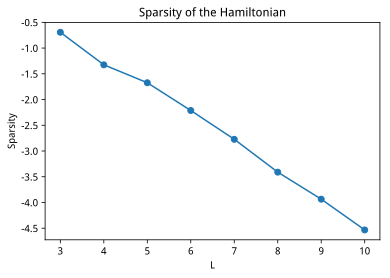

In [4]:
x=arange(3, 11)
s=array([sparsity(Hamilton_trans(i, 0.1)) for i in x])
plot(x, log(s), '-o')
title('Sparsity of the Hamiltonian')
xlabel('L')
ylabel('Sparsity');

In [5]:
A=Hamilton_trans(10, 0.4)
eigsh(A, which='SA')
#Lanczos

(array([-10.40418892, -10.40415281,  -7.877041  ,  -7.77197069,
         -7.77197069,  -7.53978857]),
 array([[ -6.70974812e-01,  -6.70996717e-01,   6.62772967e-02,
          -1.71695105e-15,   8.04911693e-16,  -1.13294487e-01],
        [ -6.78001453e-02,  -6.77963019e-02,  -3.51759959e-02,
          -3.12353131e-02,  -5.06153367e-02,   6.96820978e-02],
        [ -6.78001453e-02,  -6.77963019e-02,  -3.51759959e-02,
          -5.50208475e-02,  -2.25890112e-02,   6.96820978e-02],
        ..., 
        [ -6.78001453e-02,   6.77963019e-02,  -3.51759959e-02,
           5.50208475e-02,   2.25890112e-02,  -6.96820978e-02],
        [ -6.78001453e-02,   6.77963019e-02,  -3.51759959e-02,
           3.12353131e-02,   5.06153367e-02,  -6.96820978e-02],
        [ -6.70974812e-01,   6.70996717e-01,   6.62772967e-02,
          -2.60995063e-15,   7.77156117e-16,   1.13294487e-01]]))

In [6]:
?eigsh

+ Spontaneous symmetry breaking
+ Read Transverse ising model
+ Tell Symmetry Broken Example except time trans
+ MPO, e.g. in paper
+ What MPO gives H with sigma_y*sigma_y
+ run this

## Spontaneous symmetry breaking
We say that the symmetry is spontaneously broken by the choice of ground state of the theory, if the ground state does not preserve the symmetry of Hamiltonian. Like initial condition determines the direction of angular momentum.

+ Breaking Translational: $V=r^2$
+ Breaking Rotational: $V=ax^2+by^2+cz^2$
+ Breaking Reflection: $V=kx$
+ Breaking Time reversal: Friction
+ Breaking Time translation: $H=mv^2/2+kt^2x^2/2$

$A=Z+Y, A_aA_b=Z_aZ_b+Y_aY_b+\{Z_aY_b+Z_?\}$

In [7]:
real(1j)

array(0.0)

In [8]:
A2=(kron(sy,sy)+kron(sz,sz)).astype(int8)
A2

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([[ 1,  0,  0, -1],
       [ 0, -1,  1,  0],
       [ 0,  1, -1,  0],
       [-1,  0,  0,  1]], dtype=int8)

In [9]:
C=(svd(A2)[-1][2:]*sqrt(2)).astype(int8)
C

array([[ 1,  0,  0,  1],
       [ 0, -1, -1,  0]], dtype=int8)